# Análisis
## Crímenes en Chicago


* Para el siguiente ejercicio utilizaremos la base de datos de crímenes para la zona de Chicago [link](https://www.kaggle.com/currie32/crimes-in-chicago/data)
* Se tienen 4 archivos:

    * Chicago_Crimes_2001_to_2004.csv
    * Chicago_Crimes_2005_to_2007.csv
    * Chicago_Crimes_2008_to_2011.csv
    * Chicago_Crimes_2012_to_2017.csv
    

* Resolver las siguientes preguntas.

    * Número total de delitos para el rango 2001-2017
    * Gráfica de barras del total de delitos claificados por años
    * Los 5 delitos con mayor número de incidencia
    

In [1]:
# Librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
%matplotlib inline

In [2]:
# leer archivos
data1 = pd.read_csv('../../data/crimes-in-chicago/Chicago_Crimes_2001_to_2004.csv', low_memory=False)
data2 = pd.read_csv('../../data/crimes-in-chicago/Chicago_Crimes_2005_to_2007.csv', low_memory=False)
data3 = pd.read_csv('../../data/crimes-in-chicago/Chicago_Crimes_2008_to_2011.csv', low_memory=False)
data4 = pd.read_csv('../../data/crimes-in-chicago/Chicago_Crimes_2012_to_2017.csv', low_memory=False)

In [3]:
# crear un solo dataframe
datap = pd.concat([data1, data2, data3, data4], ignore_index=True)

In [4]:
# checar integridad del dataframe
datap.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,879,4786321,HM399414,01/01/2004 12:01:00 AM,082XX S COLES AVE,0840,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,...,7.0,46.0,06,NaN,NaN,2004.0,08/17/2015 03:03:40 PM,NaN,NaN,NaN
1,2544,4676906,HM278933,03/01/2003 12:00:00 AM,004XX W 42ND PL,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,...,11.0,61.0,26,1173974.0,1876757.0,2003.0,04/15/2016 08:55:02 AM,41.817229156,-87.637328,"(41.817229156, -87.637328162)"
2,2919,4789749,HM402220,06/20/2004 11:00:00 AM,025XX N KIMBALL AVE,1752,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,...,35.0,22.0,20,NaN,NaN,2004.0,08/17/2015 03:03:40 PM,NaN,NaN,NaN
3,2927,4789765,HM402058,12/30/2004 08:00:00 PM,045XX W MONTANA ST,0840,THEFT,FINANCIAL ID THEFT: OVER $300,OTHER,False,...,31.0,20.0,06,NaN,NaN,2004.0,08/17/2015 03:03:40 PM,NaN,NaN,NaN
4,3302,4677901,HM275615,05/01/2003 01:00:00 AM,111XX S NORMAL AVE,0841,THEFT,FINANCIAL ID THEFT:$300 &UNDER,RESIDENCE,False,...,34.0,49.0,06,1174948.0,1831051.0,2003.0,04/15/2016 08:55:02 AM,41.691784636,-87.635116,"(41.691784636, -87.635115968)"


In [5]:
# información del dataframe
datap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7941283 entries, 0 to 7941282
Data columns (total 23 columns):
Unnamed: 0              int64
ID                      int64
Case Number             object
Date                    object
Block                   object
IUCR                    object
Primary Type            object
Description             object
Location Description    object
Arrest                  bool
Domestic                bool
Beat                    int64
District                float64
Ward                    float64
Community Area          float64
FBI Code                object
X Coordinate            float64
Y Coordinate            object
Year                    float64
Updated On              object
Latitude                object
Longitude               float64
Location                object
dtypes: bool(2), float64(6), int64(3), object(12)
memory usage: 1.3+ GB


In [6]:
# elimnar las columnas que no tienen información relevante
data = datap[['Primary Type', 'Description', 'Location Description', 'Arrest','Domestic', 'Year', 'Date']]

In [7]:
# checar la integridad del dataFrame
data.head()

,Primary Type,Description,Location Description,Arrest,Domestic,Year,Date
0,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,False,2004.0,01/01/2004 12:01:00 AM
1,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,True,2003.0,03/01/2003 12:00:00 AM
2,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,False,2004.0,06/20/2004 11:00:00 AM
3,THEFT,FINANCIAL ID THEFT: OVER $300,OTHER,False,False,2004.0,12/30/2004 08:00:00 PM
4,THEFT,FINANCIAL ID THEFT:$300 &UNDER,RESIDENCE,False,False,2003.0,05/01/2003 01:00:00 AM


In [8]:
# información del dataframe a trabajar
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7941283 entries, 0 to 7941282
Data columns (total 7 columns):
Primary Type            object
Description             object
Location Description    object
Arrest                  bool
Domestic                bool
Year                    float64
Date                    object
dtypes: bool(2), float64(1), object(4)
memory usage: 318.1+ MB


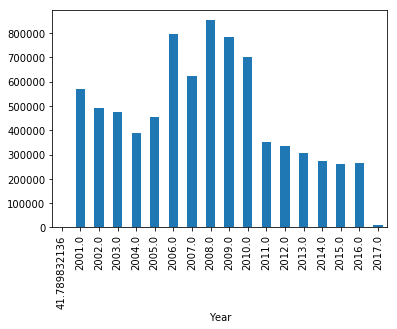

In [9]:
# desplegar gráfica de delitos por año
data.groupby('Year').count()['Arrest'].plot.bar()

In [10]:
# aplicar un estilo a la gráfica
plt.style.use('ggplot')

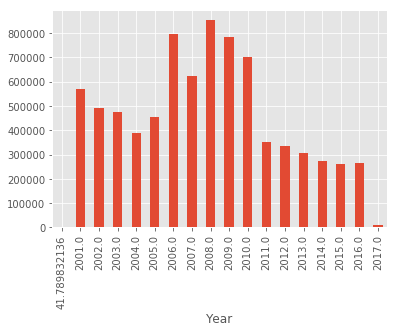

In [11]:
# clasificación por año
data.groupby('Year').count()['Arrest'].plot.bar()

In [12]:
# descripción del dataframe
data.describe()

,Year
count,7.941283e+06
mean,2.007672e+03
std,4.123451e+00
min,4.178983e+01
25%,2.005000e+03
50%,2.008000e+03
75%,2.010000e+03
max,2.017000e+03


In [13]:
# eliminar datos atípicos
data = data.loc[data['Year'] >= 2001]

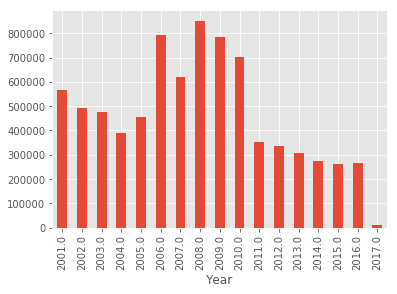

In [14]:
# clasificación por año
data.groupby('Year').count()['Arrest'].plot.bar()

In [15]:
# cambiar el tipo de dato de la columna 'Year'
data['Year'] = data['Year'].astype(int)

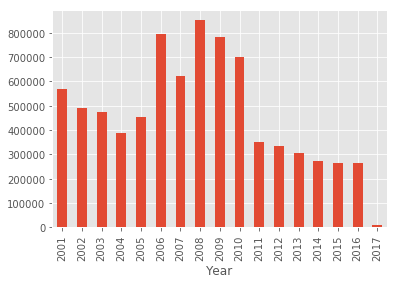

In [16]:
# clasificación por año
data.groupby('Year').count()['Arrest'].plot.bar()

In [18]:
# generar columnas
for i in np.unique(data['Primary Type']):
    data[i] = [1 if x==i else 0 for x in data['Primary Type']]

In [20]:
# checar integridad data frame
data.head()

,Primary Type,Description,Location Description,Arrest,Domestic,Year,Date,ARSON,ASSAULT,BATTERY,...,OTHER OFFENSE,PROSTITUTION,PUBLIC INDECENCY,PUBLIC PEACE VIOLATION,RITUALISM,ROBBERY,SEX OFFENSE,STALKING,THEFT,WEAPONS VIOLATION
0,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,False,2004,01/01/2004 12:01:00 AM,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,True,2003,03/01/2003 12:00:00 AM,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,False,2004,06/20/2004 11:00:00 AM,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,THEFT,FINANCIAL ID THEFT: OVER $300,OTHER,False,False,2004,12/30/2004 08:00:00 PM,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,THEFT,FINANCIAL ID THEFT:$300 &UNDER,RESIDENCE,False,False,2003,05/01/2003 01:00:00 AM,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [22]:
# checar columnas
data.columns

Index(['Primary Type', 'Description', 'Location Description', 'Arrest',
       'Domestic', 'Year', 'Date', 'ARSON', 'ASSAULT', 'BATTERY', 'BURGLARY',
       'CONCEALED CARRY LICENSE VIOLATION', 'CRIM SEXUAL ASSAULT',
       'CRIMINAL DAMAGE', 'CRIMINAL TRESPASS', 'DECEPTIVE PRACTICE',
       'DOMESTIC VIOLENCE', 'GAMBLING', 'HOMICIDE', 'HUMAN TRAFFICKING',
       'INTERFERENCE WITH PUBLIC OFFICER', 'INTIMIDATION', 'KIDNAPPING',
       'LIQUOR LAW VIOLATION', 'MOTOR VEHICLE THEFT', 'NARCOTICS',
       'NON - CRIMINAL', 'NON-CRIMINAL', 'NON-CRIMINAL (SUBJECT SPECIFIED)',
       'OBSCENITY', 'OFFENSE INVOLVING CHILDREN', 'OTHER NARCOTIC VIOLATION',
       'OTHER OFFENSE', 'PROSTITUTION', 'PUBLIC INDECENCY',
       'PUBLIC PEACE VIOLATION', 'RITUALISM', 'ROBBERY', 'SEX OFFENSE',
       'STALKING', 'THEFT', 'WEAPONS VIOLATION'],
      dtype='object')

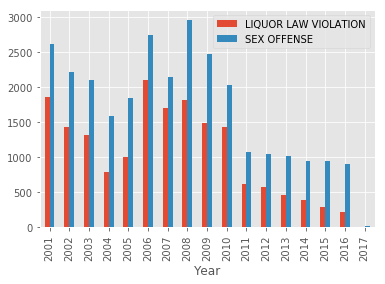

In [24]:
# clasificación por año
data.groupby('Year').sum()[['LIQUOR LAW VIOLATION','SEX OFFENSE']].plot.bar()

In [26]:
# scatter plot
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7941282 entries, 0 to 7941282
Data columns (total 42 columns):
Primary Type                         object
Description                          object
Location Description                 object
Arrest                               bool
Domestic                             bool
Year                                 int64
Date                                 object
ARSON                                int64
ASSAULT                              int64
BATTERY                              int64
BURGLARY                             int64
CONCEALED CARRY LICENSE VIOLATION    int64
CRIM SEXUAL ASSAULT                  int64
CRIMINAL DAMAGE                      int64
CRIMINAL TRESPASS                    int64
DECEPTIVE PRACTICE                   int64
DOMESTIC VIOLENCE                    int64
GAMBLING                             int64
HOMICIDE                             int64
HUMAN TRAFFICKING                    int64
INTERFERENCE WITH PUBLIC 

In [ ]:
data.sum()